<a href="https://colab.research.google.com/github/jmcava/jmcava/blob/main/Verean%C3%A7a_zona_283_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/votacao_candidato_283.csv'

# Carregar o arquivo com a codificação adequada e o separador correto
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Exibir as colunas para confirmação
print("Colunas disponíveis no arquivo:")
print(df.columns)

# Filtrar apenas os candidatos eleitos e reeleitos com base na situação de totalização
# Certifique-se de ajustar os valores de acordo com a nomenclatura do seu arquivo
df_eleitos = df[df['Situação totalização'].str.contains('Eleito', case=False, na=False)]

# Selecionar colunas relevantes
df_eleitos = df_eleitos[['Nome candidato', 'Partido','Votos nominais']]

# Ordenar por votos nominais de forma decrescente
df_eleitos_sorted = df_eleitos.sort_values(by='Votos nominais', ascending=False)

# Mostrar os primeiros registros para validação
print(df_eleitos_sorted.head())

# Salvar o resultado em um novo arquivo CSV
df_eleitos_sorted.to_csv('/content/candidatos_eleitos_283.csv', index=False, encoding='utf-8')


Colunas disponíveis no arquivo:
Index(['Ano de eleição', 'Cargo', 'Nome candidato', 'Partido',
       'Situação totalização', 'Município', 'Zona', 'UF', 'Votos nominais',
       'Data de carga'],
      dtype='object')
                Nome candidato    Partido  Votos nominais
46     JOILSON SANTOS CARVALHO       PRTB            2806
367  PERY RODRIGUES DOS SANTOS  CIDADANIA            2073
457       DANILO LIMA DE RAMOS       PODE            1371
554  JOÃO VICTOR VIANA PEREIRA  CIDADANIA            1216
176         JULIO CESAR FUZARI  CIDADANIA            1125


In [4]:
print(df_eleitos)

                           Nome candidato Partido  Votos nominais
0              ANA MARIA DO CARMO ROSSETO      PT             326
1                GETULIO BATISTA CANGUSSU      PT             226
5           JOSE AURELIO BACELAR DE PAULA    PODE             904
6    SANDRA CRISTINA DE OLIVEIRA CERCHIAI    NOVO              15
9                     MARIA MARLENE ALVES     PDT              20
..                                    ...     ...             ...
558              RAFAEL JANUARIO TEIXEIRA      DC              33
559             ALEXSANDRO DA SILVA LEITE      DC               6
560                  DAVI CARLOS DE SOUZA      DC             112
561                     MATHIAS BORNHOLDT      DC               3
562            DOMINGOS MONTEIRO DE SOUSA     PSB               5

[245 rows x 3 columns]


In [5]:
# Verifique os valores únicos na coluna de Situação totalização para identificar o termo correto
print(df['Situação totalização'].unique())

# Ajustar o filtro para incluir apenas candidatos eleitos
df_eleitos_corrigido = df[df['Situação totalização'].isin(['Eleito', 'Eleito por Média', 'Eleito por QP'])]

# Recontar o total de candidatos eleitos
total_eleitos_corrigido = len(df_eleitos_corrigido)
print(f"Total de candidatos eleitos: {total_eleitos_corrigido}")


['Eleito' 'Suplente' 'Não Eleito']
Total de candidatos eleitos: 28


In [6]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias e ordená-las
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado
print(df_final.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final.to_csv('/content/candidatos_eleitos_filtrados.csv', index=False, encoding='utf-8')


                   Nome candidato Partido  Votos nominais
0      ANA MARIA DO CARMO ROSSETO      PT             326
1        GETULIO BATISTA CANGUSSU      PT             226
5   JOSE AURELIO BACELAR DE PAULA    PODE             904
15         LUIZ HENRIQUE WATANABE    PRTB             810
31   ANA NICE MARTINS DE CARVALHO      PT             903


In [7]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Exibir as primeiras linhas do resultado ordenado
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados.csv', index=False, encoding='utf-8')


                Nome candidato    Partido  Votos nominais
46     JOILSON SANTOS CARVALHO       PRTB            2806
367  PERY RODRIGUES DOS SANTOS  CIDADANIA            2073
457       DANILO LIMA DE RAMOS       PODE            1371
554  JOÃO VICTOR VIANA PEREIRA  CIDADANIA            1216
176         JULIO CESAR FUZARI  CIDADANIA            1125


In [8]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


                Nome candidato    Partido  Votos nominais  Posição
46     JOILSON SANTOS CARVALHO       PRTB            2806        1
367  PERY RODRIGUES DOS SANTOS  CIDADANIA            2073        2
457       DANILO LIMA DE RAMOS       PODE            1371        3
554  JOÃO VICTOR VIANA PEREIRA  CIDADANIA            1216        4
176         JULIO CESAR FUZARI  CIDADANIA            1125        5


In [9]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Reorganizar as colunas para garantir que 'Posição' seja a primeira
df_final_sorted = df_final_sorted[['Posição', 'Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


     Posição             Nome candidato    Partido  Votos nominais
46         1    JOILSON SANTOS CARVALHO       PRTB            2806
367        2  PERY RODRIGUES DOS SANTOS  CIDADANIA            2073
457        3       DANILO LIMA DE RAMOS       PODE            1371
554        4  JOÃO VICTOR VIANA PEREIRA  CIDADANIA            1216
176        5         JULIO CESAR FUZARI  CIDADANIA            1125


In [11]:
print(df_final_sorted.index)

Index([ 46, 367, 457, 554, 176, 552,   5,  31, 547,  15,  79, 401, 395, 120,
        68, 512, 349, 472,  65,   0, 338, 524, 151,   1,  34, 149, 318, 280],
      dtype='int64')


In [12]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                       Nome candidato      Partido  Votos nominais
       1              JOILSON SANTOS CARVALHO         PRTB            2806
       2            PERY RODRIGUES DOS SANTOS    CIDADANIA            2073
       3                 DANILO LIMA DE RAMOS         PODE            1371
       4            JOÃO VICTOR VIANA PEREIRA    CIDADANIA            1216
       5                   JULIO CESAR FUZARI    CIDADANIA            1125
       6                  ALESSANDRO DA SILVA       AVANTE            1047
       7        JOSE AURELIO BACELAR DE PAULA         PODE             904
       8         ANA NICE MARTINS DE CARVALHO           PT             903
       9             LUANA ELOÁ MARTINS NOBRE          MDB             847
      10               LUIZ HENRIQUE WATANABE         PRTB             810
      11                 MARINA PEREIRA BRAGA           PL             773
      12        FRANCISCO JOSE RODRIGUES NETO         PODE             676
      13 ESTEVÃO EDMAR HA

Codificação detectada: ISO-8859-1


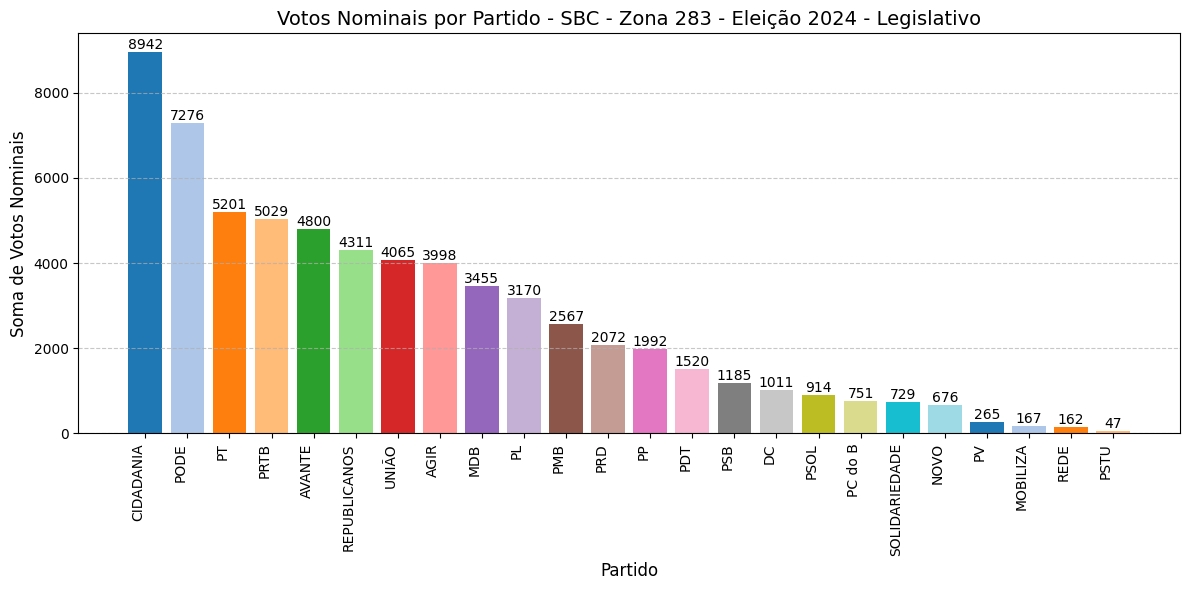

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detecta a codificação
with open("/content/votacao_candidato_283.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(f"Codificação detectada: {result['encoding']}")

# Carrega o CSV com a codificação e o separador corretos
df_283 = pd.read_csv("/content/votacao_candidato_283.csv", encoding=result['encoding'], sep=";")

# Agrupa por partido e soma os votos nominais
df_agregado_283 = df_283.groupby('Partido')['Votos nominais'].sum().reset_index()

# Ordena os dados para o gráfico (opcional, mas recomendado)
df_agregado_283 = df_agregado_283.sort_values('Votos nominais', ascending=False)



# Cria o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df_agregado_283['Partido'], df_agregado_283['Votos nominais'], color=plt.colormaps['tab20'].colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 283 - Eleição 2024 - Legislativo', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')


plt.show()